## Chapter 8 - Problem 8
***

8. In the lab, a classification tree was applied to the Carseats data set after
converting Sales into a qualitative response variable. Now we will
seek to predict Sales using regression trees and related approaches,
treating the response as a quantitative variable.

In [13]:
require(ISLR)
require(tree)

A. Split the data set into a training set and a test set.

In [14]:
train = sample(1:nrow(Carseats),300)
Train.carseats = Carseats[train,]
Test.carseats = Carseats[-train,]

B. Fit a regression tree to the training set. Plot the tree, and interpret
the results. What test error rate do you obtain?

In [15]:
tree.carseats <- tree(Sales~.,data = Train.carseats)
summary(tree.carseats)


Regression tree:
tree(formula = Sales ~ ., data = Train.carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "CompPrice"   "Income"      "Advertising"
[6] "Age"        
Number of terminal nodes:  17 
Residual mean deviance:  2.414 = 683 / 283 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.44800 -1.01800 -0.07413  0.00000  1.00100  4.66900 

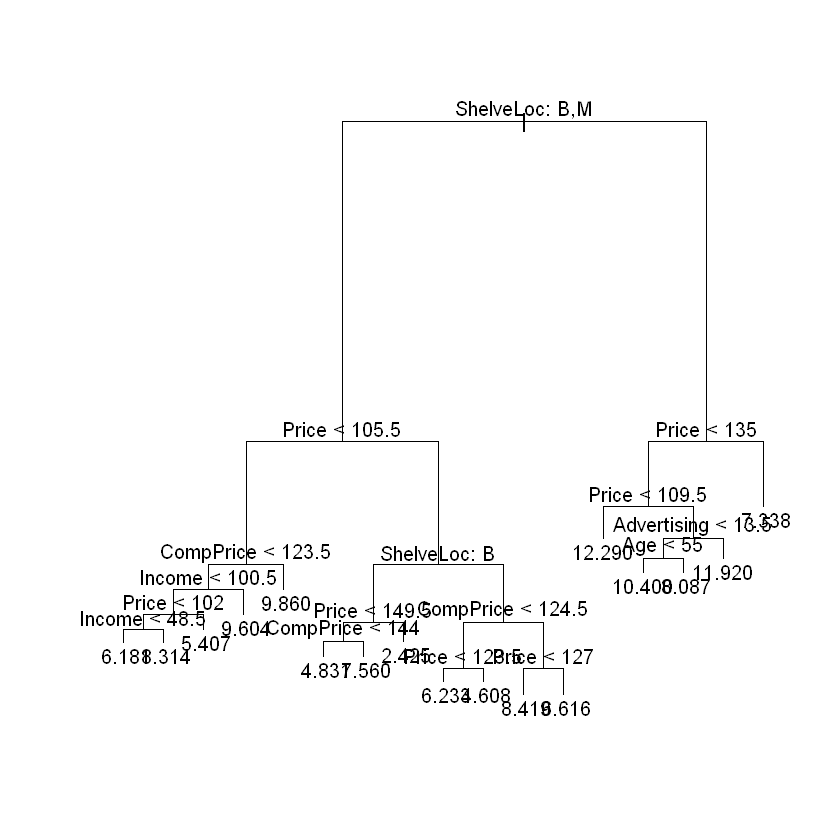

In [16]:
plot(tree.carseats)
text(tree.carseats, pretty = 1)

In [17]:
tree.pred <- predict(tree.carseats, newdata = Test.carseats) #type class to predict the classification not the probabilities
Test.MSE <- mean((tree.pred - Test.carseats$Sales)^2)
Test.MSE

[1] 4.952387

C. Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test error
rate?

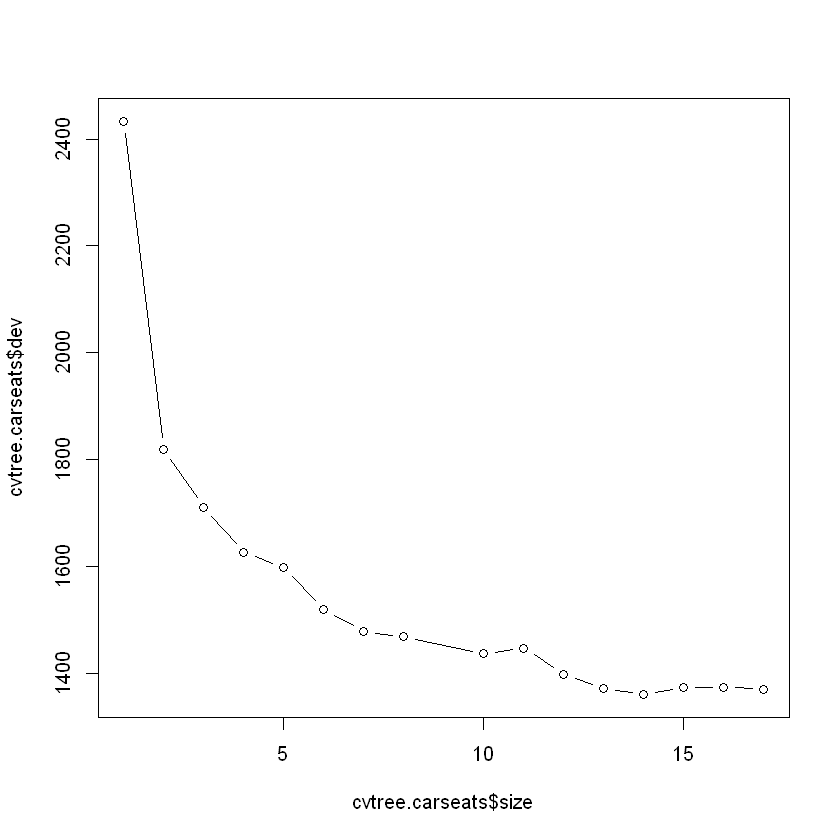

In [18]:
cvtree.carseats <- cv.tree(tree.carseats, FUN = prune.tree)
plot(cvtree.carseats$size, cvtree.carseats$dev, type = "b")

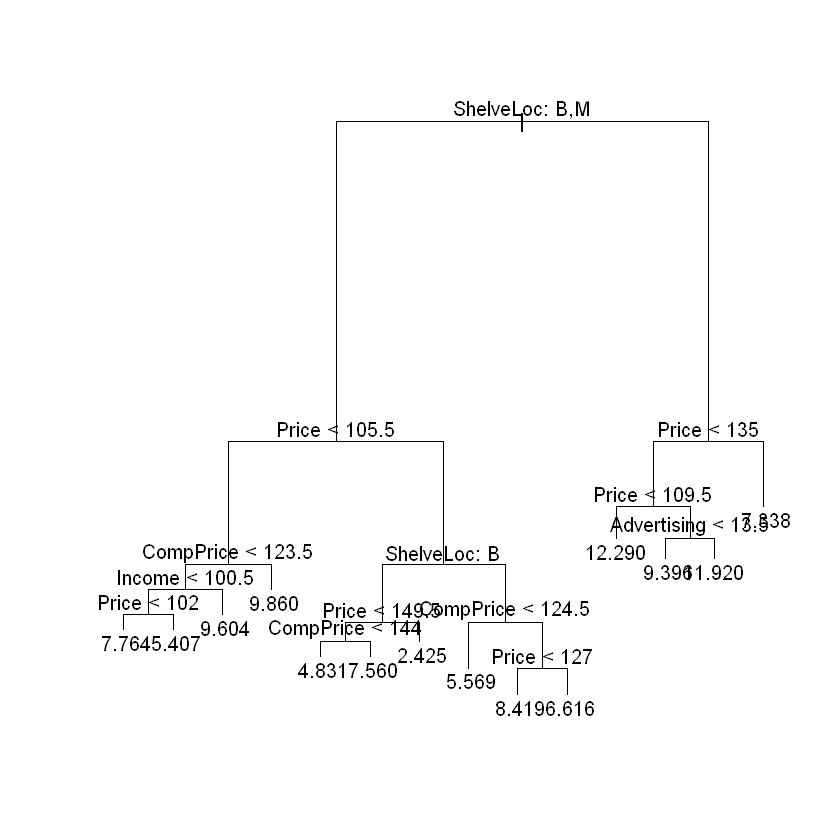

In [28]:
#Best tree complexity is 14
best.carseats = prune.tree(tree.carseats, best = 14)
plot(best.carseats); text(best.carseats, pretty = 1)

In [29]:
tree.pred <- predict(best.carseats, newdata = Test.carseats) #type class to predict the classification not the probabilities
Test.MSE <- mean((tree.pred - Test.carseats$Sales)^2)
Test.MSE

[1] 4.666844

There is a slight decrease in the test error when using the pruned tree.

D. Use the bagging approach in order to analyze this data. What
test error rate do you obtain? Use the importance() function to
determine which variables are most important.

In [60]:
require(randomForest)

x.train <- Train.carseats[,-1]
y.train <- Train.carseats[,1]
x.test <- Test.carseats[,-1]
y.test <- Test.carseats[,1]

Bagging.Carseats <- randomForest(x = x.train, y = y.train, xtest = x.test, ytest = y.test, 
                                 mtry = 10, ntree = 500,importance = T)
importance(Bagging.Carseats)

,%IncMSE,IncNodePurity
CompPrice,33.1899572,248.959780
Income,11.1062587,116.772741
Advertising,24.1861326,182.665865
Population,0.7208621,74.026740
Price,74.5690959,679.934584
ShelveLoc,74.0882269,792.419298
Age,19.2299226,176.446275
Education,4.0892941,67.309554
Urban,-1.7866022,9.230597
US,5.1995422,15.757692


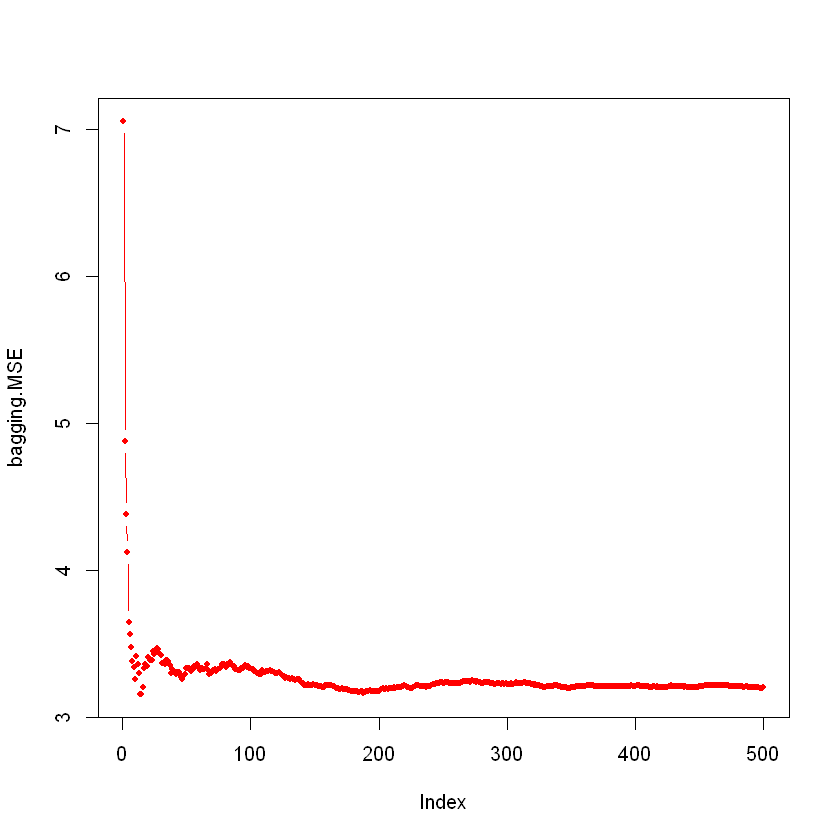

In [50]:
bagging.MSE = Bagging.Carseats$test$mse  

plot(bagging.MSE, type = "b",col = "red", pch = 20)

In [51]:
bagging.MSE[500]

[1] 3.200603

The test MSE of the bagging method is significantly lower than pruned decision tree.
The most important variables are ShelveLoc, Price, CompPrice and Advertising

E. Use random forests to analyze this data. What test error rate do
you obtain? Use the importance() function to determine which
variables are most important. Describe the effect of m, the number
of variables considered at each split, on the error rate
obtained.

In [81]:
nvars <- c(3,4,6,8) #

importance.carseats = matrix(NA, nrow = ncol(Carseats) - 1, length(nvars))
RF.test.error = matrix(NA, nrow = 500, length(nvars))

for (i in 1:length(nvars)){
    Bagging.Carseats <- randomForest(x = x.train, y = y.train, xtest = x.test, ytest = y.test, 
                                 mtry = nvars[i], ntree = 500)
    importance.carseats[,i] <- importance(Bagging.Carseats)
    RF.test.error[,i] <- Bagging.Carseats$test$mse
}

rownames(importance.carseats) <- rownames(importance(Bagging.Carseats))


In [82]:
importance.carseats

CompPrice,205.66722,213.00177,231.51969,239.074946
Income,159.15825,146.46706,130.22774,123.290783
Advertising,227.50966,224.82366,216.12518,195.419954
Population,145.70596,119.68005,92.95729,81.850351
Price,557.28533,590.98858,641.23191,659.887980
ShelveLoc,609.91644,662.62375,727.97387,777.667341
Age,221.02840,228.13422,205.29481,192.888092
Education,97.19996,87.13440,71.66470,70.148970
Urban,17.00913,13.38236,11.35483,9.493068
US,39.93505,31.55147,21.95702,15.954203


In [ ]:
The most important variables regardless of the value of m are ShelveLoc and Price.
The relative importance of Age, Advertising and CompPrice change with m. <br>
At low number of predictors per split: Age + Advertising are the next two important variables.
At high number of predictors per split: CompPrice + Advertising are the next two important variables.


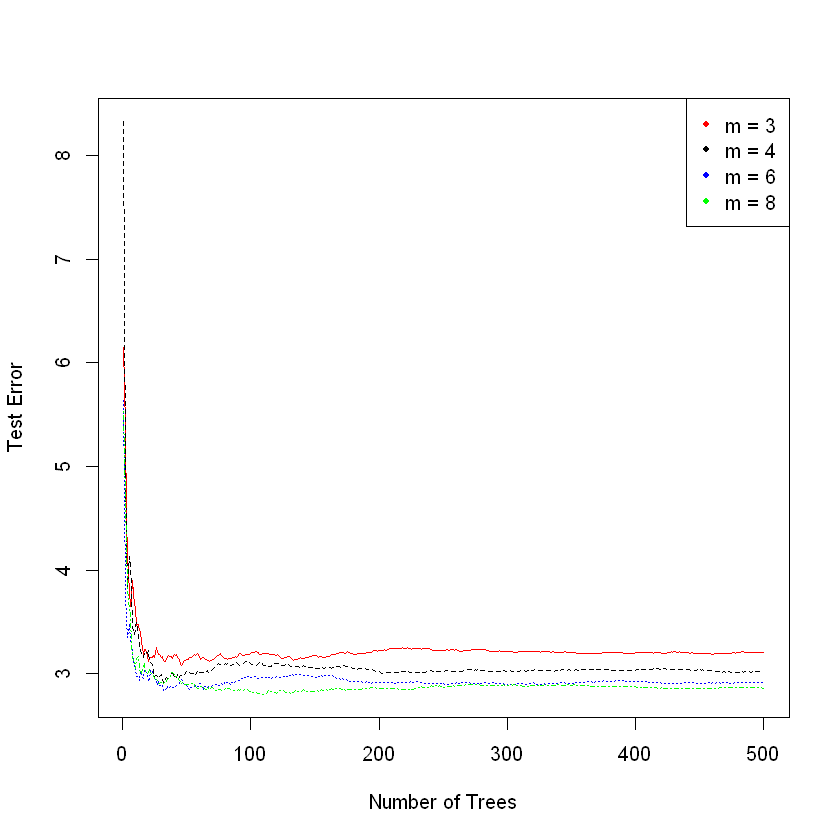

In [89]:
matplot(1:500,RF.test.error, pch = 20, type = "l", lwd = 0.3, cex = 0.5, 
        col = c("red","black","blue","green"), xlab = "Number of Trees", ylab = "Test Error")
legend("topright", c("m = 3","m = 4","m = 6","m = 8")
       , col = c("red","black","blue","green"), pch = 20)

The lowest test error is obtained at 8 variables per split.

In [91]:
RF.testerror <- mean(RF.test.error[,4])
RF.testerror

[1] 2.892281

The test error using random forest is lower than both the regression tree and the bagging method.